In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor



import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data set
data = pd.read_csv('../inputs/bestsellers with categories.csv')

In [3]:
# printing information of dataset
print(data.info)

<bound method DataFrame.info of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson  

In [4]:
# showing features of dataset
print(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')>


In [5]:
# printing first 6 row
data.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


([<matplotlib.patches.Wedge at 0x1af73d53c70>,
 [Text(1.0554422683381766, 0.30990582150899426, '2016'),
  Text(0.7203467861122989, 0.8313245501834299, '2011'),
  Text(0.15654627576372776, 1.0888035927312634, '2018'),
  Text(-0.4569565739181998, 1.0005951676641962, '2017'),
  Text(-0.9253789316708985, 0.5947048283136995, '2019'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '2014'),
  Text(-0.9253788203103135, -0.5947050015941457, '2010'),
  Text(-0.456956386553231, -1.0005952532309026, '2009'),
  Text(0.15654647964602333, -1.0888035634174043, '2015'),
  Text(0.7203469417807291, -0.8313244152959488, '2013'),
  Text(1.0554423263691122, -0.30990562387371495, '2012')],
 [Text(0.5756957827299144, 0.16903953900490593, '9.1%\n(50)'),
  Text(0.3929164287885266, 0.45344975464550713, '9.1%\n(50)'),
  Text(0.08538887768930604, 0.5938928687625072, '9.1%\n(50)'),
  Text(-0.24924904031901807, 0.5457791823622888, '9.1%\n(50)'),
  Text(-0.5047521445477627, 0.32438445180747244, '9.1%\n(50)'),
 

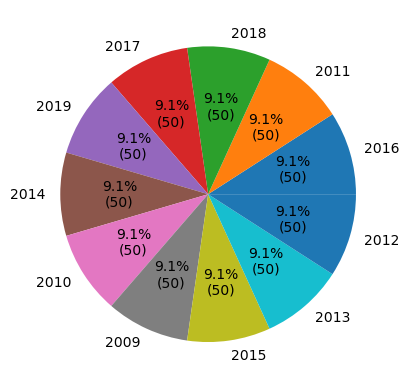

In [6]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = data['Year'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

<AxesSubplot:xlabel='Price'>

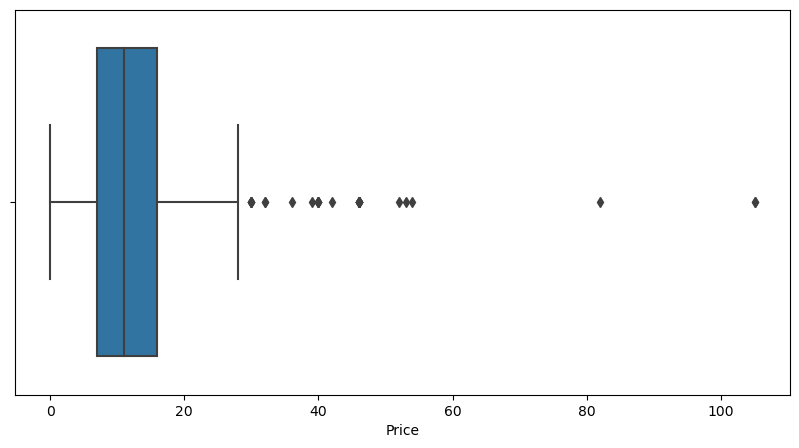

In [7]:
#book's price
plt.figure(figsize=(10,5))
sns.boxplot(data['Price'])

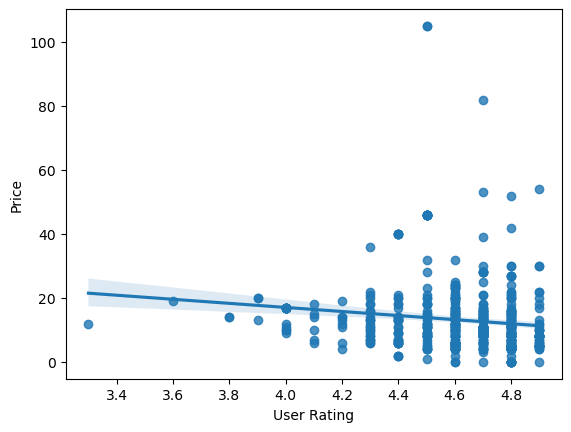

In [8]:
# price relationship between user rating
sns.regplot(data=data, x='User Rating', y='Price')
plt.show()

In [9]:
#Spread of User Ratings

In [10]:
bkdata=data.drop_duplicates(subset=['Name'], keep='last')
u_rating=bkdata['User Rating'].value_counts().to_frame().reset_index().rename(columns={'index':'User Rating', 'User Rating':'Quantity'})
trace4=go.Scatter(x=u_rating['User Rating'], y=u_rating['Quantity'], mode='markers', 
                   marker=dict(size=u_rating['Quantity'], 
                    color=u_rating['Quantity'],colorscale='Rainbow', showscale=True))
d4=[trace4]
layout=go.Layout(height=600, width=900,
    
    title='Spread of User Ratings',
       xaxis=dict(title='User Rating'),
       yaxis=dict(title='Quantity'))

fig=go.Figure(data=d4, layout=layout)


fig.show()

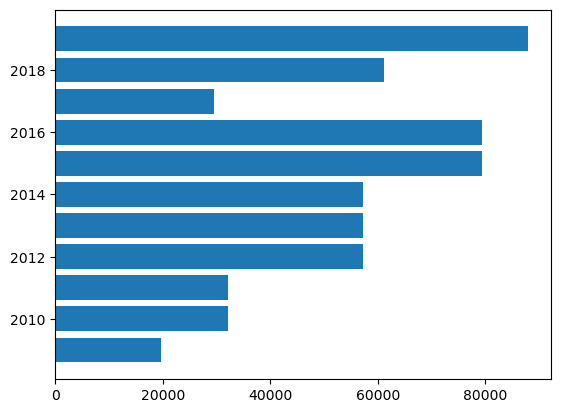

In [11]:
# book review counts by years

plt.barh(y=data['Year'], width=data['Reviews'])
plt.show()

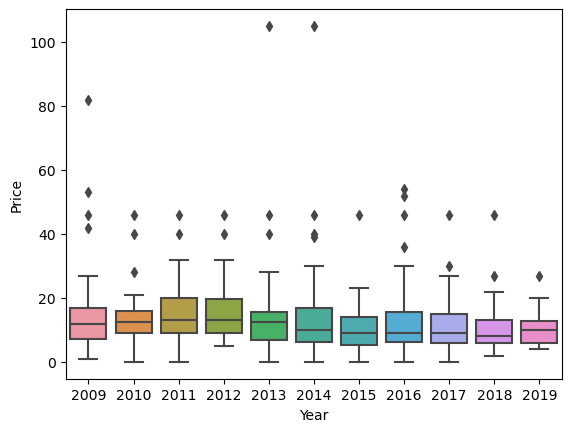

In [12]:
sns.boxplot(x=data['Year'], y=data['Price'])
plt.show()

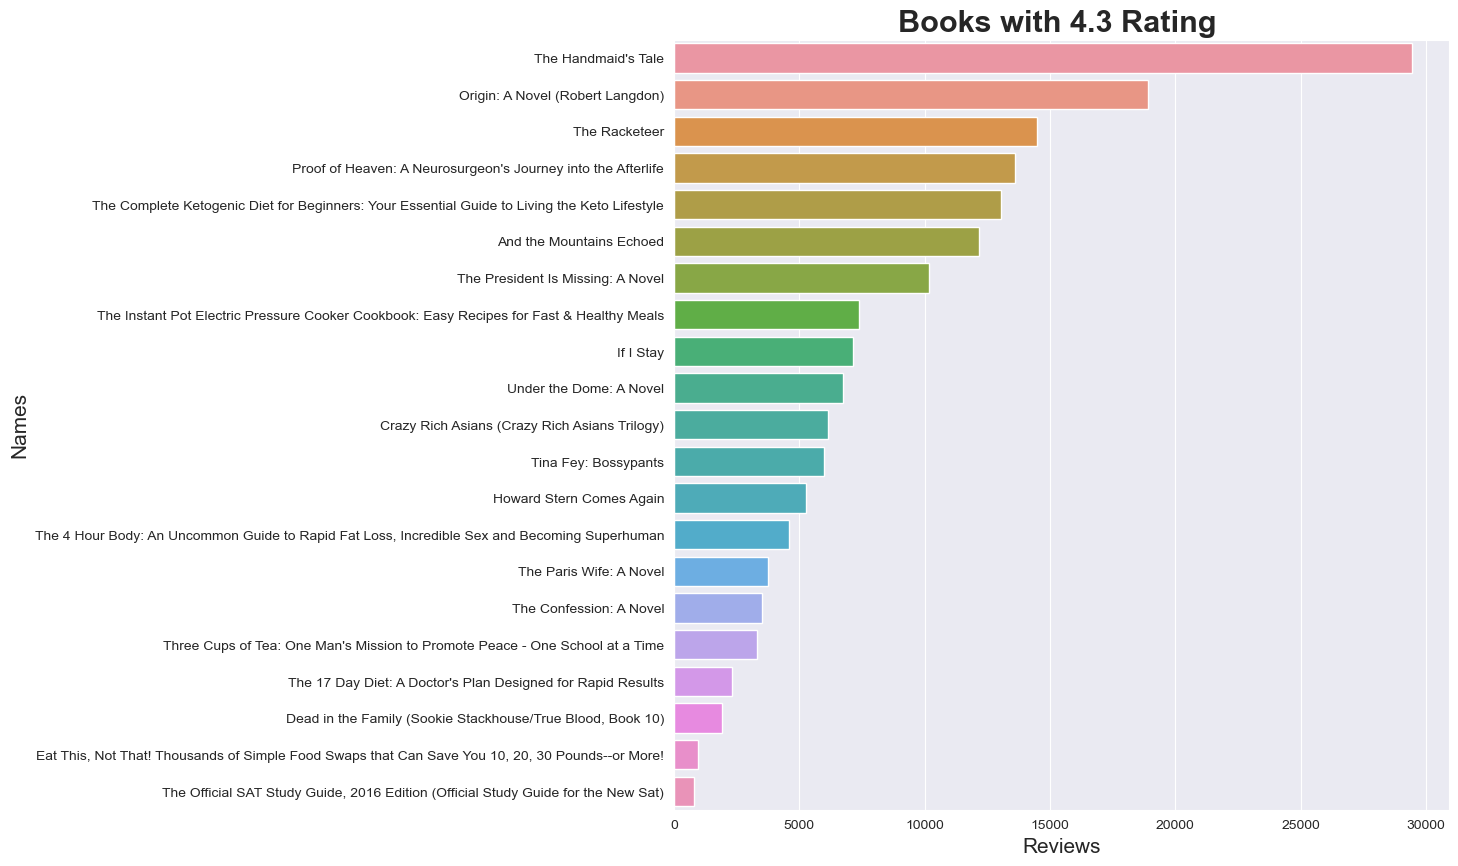

In [13]:
df1=data[data["User Rating"]==4.3]
x= df1.groupby("Name").Reviews.mean().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.barplot(x=x.values,y=x.index,)
plt.xlabel("Reviews", fontdict={"fontsize":15})
plt.ylabel("Names", fontdict={"fontsize":15})
plt.title( "Books with 4.3 Rating ", fontdict={"fontweight":"bold", "fontsize":22})
plt.show()

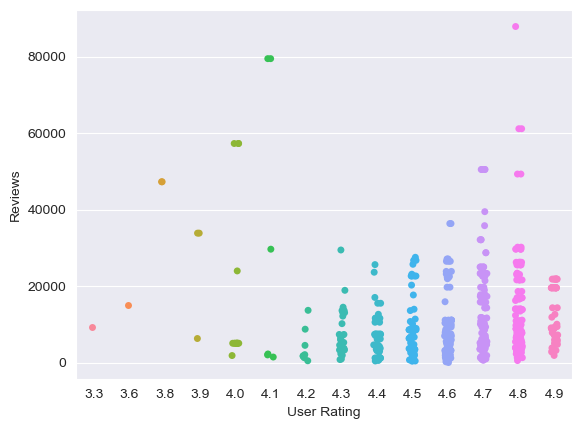

In [14]:
sns.stripplot(x=data['User Rating'], y=data['Reviews'])
plt.show()

In [15]:
#Top 10 Bestseller books by number of reviews

In [16]:
bkdata=data.drop_duplicates(subset=['Name'], keep='last')
bksbyrev=bkdata.sort_values(['Reviews'], ascending=False).head(10).reset_index()
trace5=go.Scatter(x=bksbyrev['Name'], y=bksbyrev['Reviews'], mode='markers', 
                   marker=dict(size=bksbyrev['Reviews'], sizeref=1000,
                    color=bksbyrev['Reviews'],colorscale='Sunset', showscale=True))
d5=[trace5]
layout=go.Layout(height=600, width=900,
    
    title='Top 10 Bestseller books by number of reviews',
       xaxis=dict(title='Book Title'),
       yaxis=dict(title='Number of reviews'))

fig=go.Figure(data=d5, layout=layout)
length=11
fig.update_layout(xaxis={'tickmode':'array', 'tickvals':list(range(length)),'ticktext':bksbyrev['Name'].str[:20].tolist(), 'tickangle':45})

fig.show()


In [17]:
# calculating price with using user rating, reviews and Year

X = data[['User Rating', 'Reviews', 'Year']]
y = data['Price']

model = RandomForestRegressor() # calling RandomForestRegressor method
model.fit(X, y)
new_data = [[4, 18979, 2023], [5, 1880, 2025]]

predictions = model.predict(new_data)
predictions

array([11.73, 10.95])

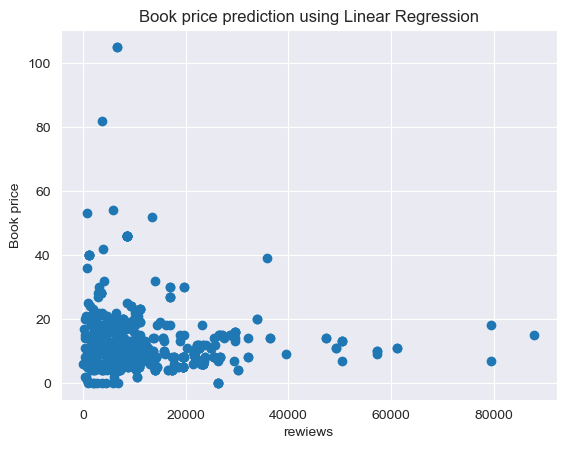

In [18]:
# predict book price with using review count

X = data[['Reviews']]
y = data['Price']

model = LinearRegression()

model.fit(X, y)

X_plot = [[i] for i in range(250, 500)]

# Predict
y_plot = model.predict(X_plot)

plt.scatter(X, y)
plt.xlabel("rewiews")
plt.ylabel("Book price")
plt.title("Book price prediction using Linear Regression")
plt.show()

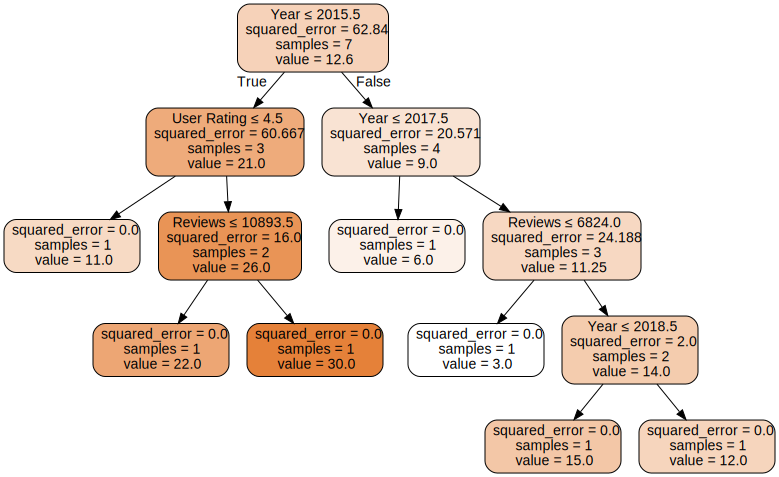

In [19]:
X = data[['User Rating', 'Reviews', 'Year']].head(10)
y = data['Price'].head(10)
model = RandomForestRegressor(n_estimators=10)
model.fit(X, y)

tree = model.estimators_[0]

dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           class_names=['Price'], 
                           filled=True,rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

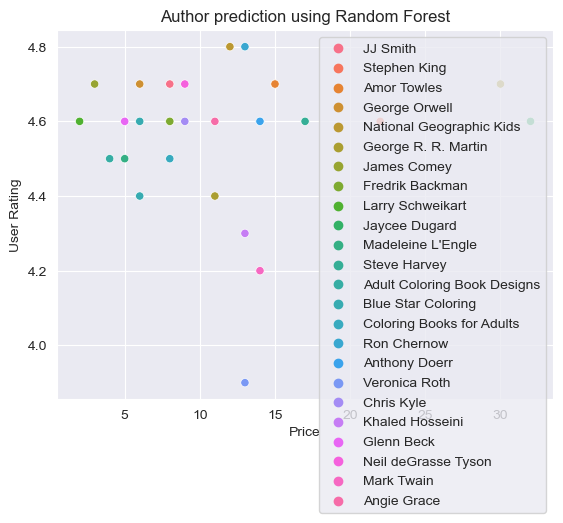

In [20]:
# predict author with price and user ratings

X = data[['Price', 'User Rating']].head(30)
y = data['Author'].head(30)

model = RandomForestClassifier()
model.fit(X, y)


y_pred = model.predict(X)

sns.scatterplot(x=data['Price'].head(30), y=data['User Rating'].head(30), hue=y_pred, data=data.head(30))
plt.title("Author prediction using Random Forest")
plt.show()